In [1]:
import os
from pathlib import Path
from typing import Union, Optional, Sequence, Mapping
import numpy as np
# import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# 设置全局字体
plt.rcParams['font.family'] = "Bradley Hand"

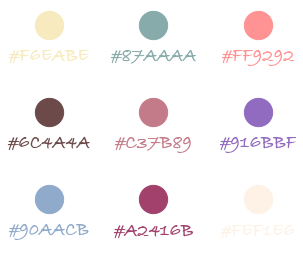

In [27]:
def view_colors(colors, n_cols=3, txt_offset=0.4, 
                margin=0.2, fname=None):
    """  pre-view colors
    """
    figsize = (n_cols * 1.5, len(colors) / n_cols * 1.5)
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_axis_off()
    for i, hex_str in enumerate(colors):
        x, y = i % n_cols, - (i // n_cols)
        ax.scatter(x, y, color=hex_str, s=800)
        ax.text(x, y - txt_offset, str(hex_str), ha="center", color=hex_str,
                fontsize=18)
    ax.set_ylim(y - txt_offset - margin, margin)
    ax.set_xlim(-margin, (n_cols - 1) + margin)
    if fname is not None:
        ax.figure.savefig(fname, bbox_inches="tight", dpi=200)
    return ax

hex_strings = ["#F6EABE", "#87AAAA", "#FF9292", "#6C4A4A", "#C37B89", "#916BBF", "#90AACB", "#A2416B", "#FEF1E6"]

ax = view_colors(hex_strings)
ax.figure.savefig("colors.png", bbox_inches="tight", dpi=200)
ax.figure.savefig("colors.pdf", bbox_inches="tight", dpi=200)

In [4]:
# 将16进制的颜色转换成 RGB 形式的三维数组
def hex2rgb(hx):
    """returns a RGB array of length 3"""
    return np.array(mcolors.to_rgb(hx))

In [5]:
# 设置矩阵大小
width = 80
height = 60

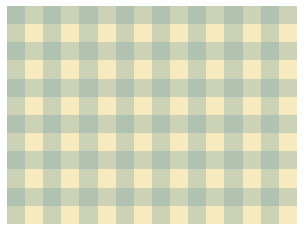

In [22]:
bg = np.ones((height, width, 3)) * hex2rgb("#F6EABE") # 背景颜色
rgb_color_fg = hex2rgb("#87AAAA")  # 格纹颜色

# Vertical
end_id = bg.shape[1]
stride = 5
alpha = 0.6
for i, loc in enumerate(range(0, end_id, stride)):
    if i % 2 == 0:
        for _shift in range(stride):
            _loc = loc + _shift
            bg[:, _loc, :] += rgb_color_fg * alpha
            bg[:, _loc, :] /= (1 + alpha)

# Horizontal 
end_id = bg.shape[0]
stride = 5
alpha = 0.6
for i, loc in enumerate(range(0, end_id, stride)):
    if i % 2 == 0:
        for _shift in range(stride):
            _loc = loc + _shift
            bg[_loc, :, :] += rgb_color_fg * alpha
            bg[_loc, :, :] /= (1 + alpha)

fig, ax = plt.subplots()
ax.imshow(bg)
ax.set_axis_off()

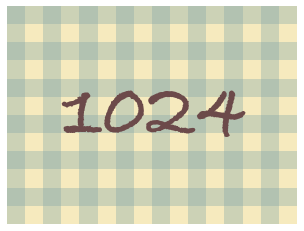

In [23]:
# 加几个字
plt.rcParams['font.family'] = "Bradley Hand"
ax.text(width / 2, height / 2 + 4, "1024", ha="center", fontsize=80, color="#6C4A4A")
fig

## 函数打包

In [8]:
def add_vertical_stripes(arr: np.ndarray, color, stride=5, width=None, offset=1, alpha=0.6,):
    """ Add vertical stripes to the given background (`arr`)
    better set `stride` much smaller than ``arr.shape[1] // 2``.
    
    color: RGB array of length 3.
    width: int. width of the strips.
    """
    arr = arr[:, offset:, :]
    end_id = arr.shape[1]
    width = stride if width is None else width
    for i, loc in enumerate(range(0, end_id, stride)):
        if i % 2 == 0:
            for _shift in range(width):
                _loc = loc + _shift
                arr[:, _loc, :] += color * alpha
                arr[:, _loc, :] /= (1 + alpha)


def add_horizontal_stripes(arr: np.ndarray, color, width=None, stride=5, offset=1, alpha=0.6):
    """ Add horizontal stripes to the given background (`arr`)
    better set `stride` much smaller than ``arr.shape[0] // 2``.
    
    color: RGB array of length 3.
    width: int. width of the strips.
    """
    arr = arr[offset:, :, :]
    end_id = arr.shape[0]
    width = stride if width is None else width

    for i, loc in enumerate(range(0, end_id, stride)):
        if i % 2 == 0:
            for _shift in range(width):
                _loc = loc + _shift
                arr[_loc, :, :] += color * alpha
                arr[_loc, :, :] /= (1 + alpha)


def image_show(arr):
    fig, ax = plt.subplots()
    ax.imshow(arr)
    ax.set_axis_off()
    return ax

## 定制条纹分布的区域

Text(40.0, 34.0, '1024')

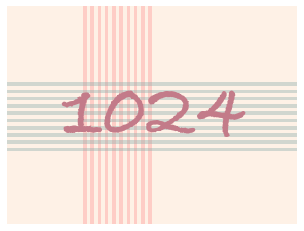

In [18]:
bg = np.ones((height, width, 3)) * hex2rgb("#FEF1E6")

add_vertical_stripes(bg[:, 20: 40, :], color=hex2rgb("#FF9292"), stride=1)
add_horizontal_stripes(bg[20: 40, :, :], color=hex2rgb("#87AAAA"), stride=1)

image_show(bg)
plt.rcParams['font.family'] = "Bradley Hand"
plt.text(width / 2, height / 2 + 4, "1024", ha="center", fontsize=80, color="#C37B89")

## 组合一下

Text(40.0, 34.0, '1024')

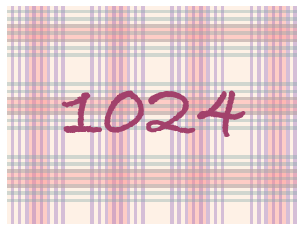

In [15]:
def add_vertical_stripe_groups(
        arr: np.ndarray, color, 
        stride=10, width=None, offset=1,
        sub_stride=1, sub_width=None, alpha=0.6,
):
    """ Add vertical stripes to the given background (`arr`)
    better set `stride` much smaller than ``arr.shape[1] // 2``.
    
    color: RGB array of length 3.
    sub_width: int. width of the strips.
    """
    arr = arr[:, offset:, :]
    end_id = arr.shape[1]
    width = stride if width is None else width
    for i, loc in enumerate(range(0, end_id, stride)):
        if i % 2 == 0:
            add_vertical_stripes(
                arr[:, loc: loc + width, :], color, 
                width=sub_width, stride=sub_stride, 
                alpha=alpha, offset=0)
        
def add_horizontal_stripe_groups(
        arr: np.ndarray, color, 
        stride=10, width=None, offset=1,
        sub_stride=1, sub_width=None, alpha=0.6,
):
    """ Add vertical stripes to the given background (`arr`)
    better set `stride` much smaller than ``arr.shape[1] // 2``.
    
    color: RGB array of length 3.
    sub_width: int. width of the strips.
    """
    arr = arr[offset:, :, :]
    end_id = arr.shape[1]
    width = stride if width is None else width
    for i, loc in enumerate(range(0, end_id, stride)):
        if i % 2 == 0:
            add_horizontal_stripes(
                arr[loc: loc + width, :, :], color, 
                width=sub_width, stride=sub_stride, 
                alpha=alpha, offset=0)
        

bg = np.ones((height, width, 3)) * hex2rgb("#FEF1E6")

v_stride = 11
add_vertical_stripes(bg, color=hex2rgb("#FF9292"), stride=v_stride, width=5, offset=6)
add_vertical_stripe_groups(bg, hex2rgb("#916BBF"), stride=v_stride, width=15)
h_stride = 10
add_horizontal_stripes(bg, color=hex2rgb("#FF9292"), stride=h_stride, width=5, offset=5)
add_horizontal_stripe_groups(bg, hex2rgb("#87AAAA"), stride=h_stride, width=13)
ax = image_show(bg)

plt.text(width / 2, height / 2 + 4, "1024", ha="center", fontsize=80, color="#A2416B")

In [12]:
ax.figure.savefig("happy1024.png", bbox_inches="tight", dpi=200)
ax.figure.savefig("happy1024.pdf", bbox_inches="tight", dpi=200)